In [1]:
from math import ceil, sqrt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
paths = [
    ('path/to/DRY/output/o_graphql-js.csv', 'GraphQL'),
    ('path/to/DRY/output/o_vue.csv', 'Vue'),
    ('path/to/DRY/output/o_react.csv', 'React'),
    ('path/to/DRY/output/o_redux.csv', 'Redux'),
    ('path/to/DRY/output/o_react-redux.csv', 'React-Redux'),
]

dfs = []

for p in paths:
    dfs.append(pd.read_csv(p[0]))

In [3]:
for (i, df) in enumerate(dfs):
    na_count = df['Similarity Score'].isna().sum()
    function_pairs_count = df['Similarity Score'].size
    print('File: {}'.format(paths[i][0]))
    print('NA values count in `Similarity Score` column: {}'.format(na_count))
    print('Function pairs count: {}\n'.format(function_pairs_count))

File: C:/dev/dry_example/o_graphql-js.csv
NA values count in `Similarity Score` column: 0
Function pairs count: 76245

File: C:/dev/dry_example/o_vue.csv
NA values count in `Similarity Score` column: 0
Function pairs count: 20910

File: C:/dev/dry_example/o_react.csv
NA values count in `Similarity Score` column: 0
Function pairs count: 6555

File: C:/dev/dry_example/o_redux.csv
NA values count in `Similarity Score` column: 0
Function pairs count: 2556

File: C:/dev/dry_example/o_react-redux.csv
NA values count in `Similarity Score` column: 0
Function pairs count: 2926



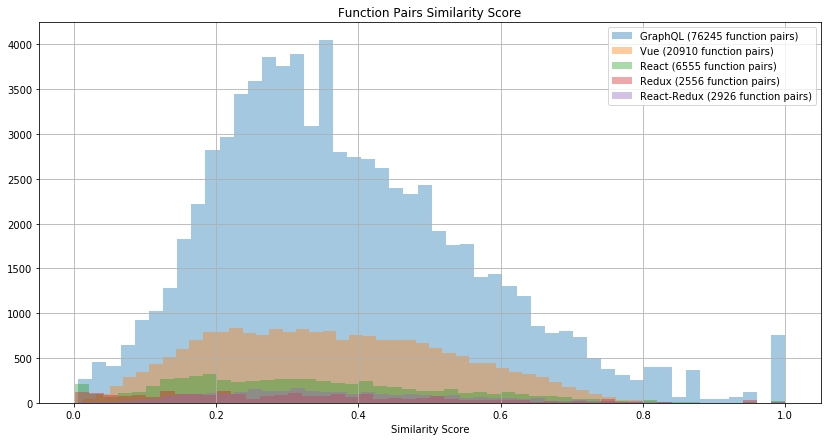

In [4]:
plt.rcParams['figure.figsize'] = 14, 7

for (i, df) in enumerate(dfs):
    if df.size > 0:
        sns.distplot(
            df['Similarity Score'],
            kde=False,
            bins=50,
            label='{0} ({1} function pairs)'.format(paths[i][1], df['Similarity Score'].size))

plt.title('Function Pairs Similarity Score')
plt.xlabel('Similarity Score')
plt.legend()
plt.grid()
plt.show()

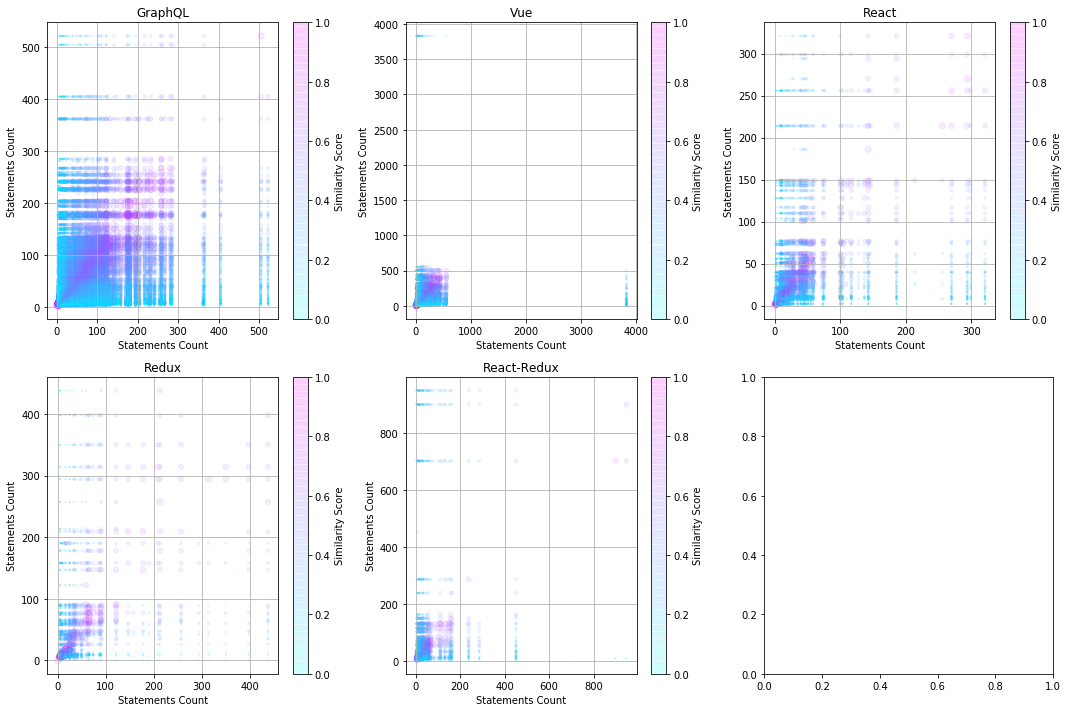

In [5]:
charts_per_line = ceil(sqrt(len(dfs)))

cols = charts_per_line
rows = ceil(len(dfs) / cols)

plt.rcParams['figure.figsize'] = 5 * cols, 5 * rows

fig, axs = plt.subplots(rows, cols)

for x in range(cols):
    for y in range(rows):
        df_idx = cols * y + x
        
        if df_idx < len(dfs):
            if (type(axs) is np.ndarray):
                axs_plot = axs[y, x]
            else:
                axs_plot = axs
            
            cur_plot = axs_plot.scatter(
                x=dfs[df_idx]['Fn1 Statements Count'],
                y=dfs[df_idx]['Fn2 Statements Count'],
                c=dfs[df_idx]['Similarity Score'],
                cmap='cool',
                s=(dfs[df_idx]['Similarity Score'] ** 2) * 60,
                alpha=0.1,
                vmin=0,
                vmax=1
            )
            axs_plot.set_xlabel('Statements Count')
            axs_plot.set_ylabel('Statements Count')
            plt.colorbar(cur_plot, label="Similarity Score", ax=axs_plot)
            axs_plot.set(title=paths[df_idx][1])
            axs_plot.grid()

fig.tight_layout()